In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import scipy.signal

/tmp/ipykernel_5452/1410368635.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = scipy.io.wavfile.read("letter_runs/1-A-PZ.wav")


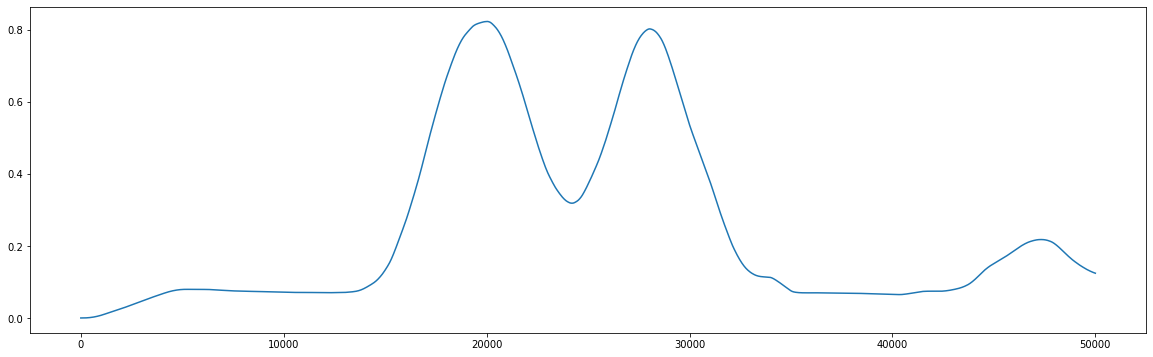

In [41]:
fs, data = scipy.io.wavfile.read("letter_runs/1-A-PZ.wav")
x = data[:, 0].astype(float) / np.iinfo(data.dtype).max
# x = x[:fs*5]
x /= np.max(np.abs(x))
# x = np.convolve(x, [1, 1])
filtered = np.convolve(np.convolve(np.abs(np.diff(x)), np.ones(4096)), np.ones(1024))
filtered /= np.max(filtered)
plt.figure(figsize=(20, 6))
plt.plot(filtered[:50000])

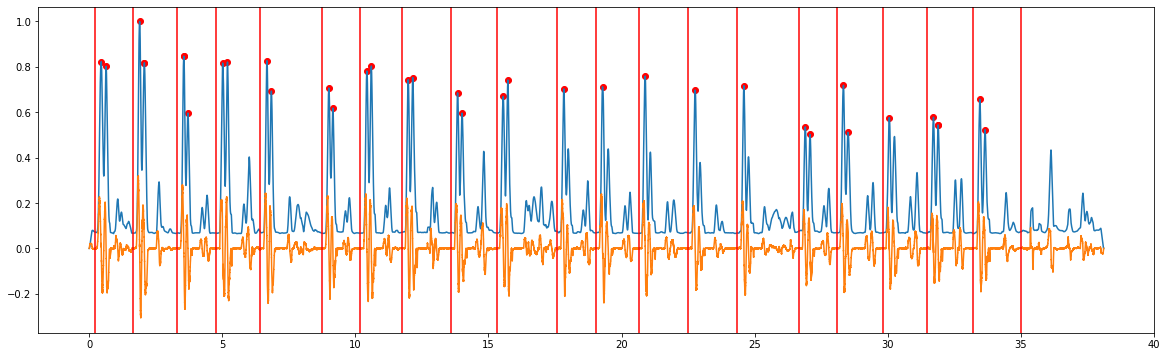

In [42]:
peaks = scipy.signal.find_peaks(filtered, height=0.5)[0]
plt.figure(figsize=(20, 6))
t = np.arange(len(filtered)) / fs
plt.plot(t, filtered)
plt.plot(t[1:], np.diff(filtered)*1000)
plt.scatter(peaks / fs, filtered[peaks], c='red')
last_peak = None
splits = []
for p in peaks:
    if not last_peak or p - last_peak > 0.5*fs:
        splits.append(int(p - 0.25*fs))
    last_peak = p
splits.append(int(35*fs))
splits = np.array(splits)
for split in splits: plt.axvline(split / fs, c='red')
for i, (start, end) in enumerate(zip(splits, splits[1:])):
    scipy.io.wavfile.write(f"letters/1/A/PZ/{i}.wav", fs, data[start:end, 0])

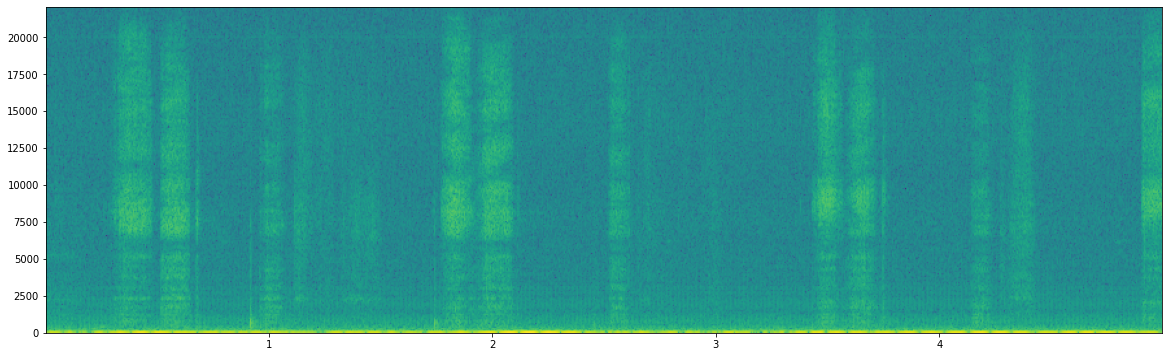

In [132]:
plt.figure(figsize=(20, 6))
_ = plt.specgram(x, Fs=fs, NFFT=512, noverlap=256)

In [133]:
from IPython.display import Audio
display(Audio(x, rate=fs))